# Inroducción

La empresa Megaline ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de los planes genera más ingresos para poder ajustar el presupuesto de publicidad.

Se realizará un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. El conjunto de datos es una muestra de 500 cliente. El objetivo es analizar el comportamiento de los mismos y determinar que plan genera mas ingresos para la compañia.

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from scipy import stats as st 
import matplotlib.pyplot as plt

C:\Users\Usuario\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Cargar los datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
try:
    calls = pd.read_csv('/datasets/megaline_calls.csv')
    internet = pd.read_csv('/datasets/megaline_internet.csv')
    messages = pd.read_csv('/datasets/megaline_messages.csv')
    plans = pd.read_csv('/datasets/megaline_plans.csv')
    users = pd.read_csv('/datasets/megaline_users.csv')
except:
    calls = pd.read_csv('megaline_calls.csv')
    internet = pd.read_csv('megaline_internet.csv')
    messages = pd.read_csv('megaline_messages.csv')
    plans = pd.read_csv('megaline_plans.csv')
    users = pd.read_csv('megaline_users.csv')

## Preparar los datos

### Planes

In [3]:
# Imprime la información general/resumen sobre el DataFrame de los planes
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [7]:
# Imprime una muestra de los datos para los planes
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


**Conclusiones:**

Luego de una vista de los elementos se puede observar los siguientes inconveniente:

- 'messages_included' debería llamarse 'messages_included_per_month'.
- 'minutes_included' debería llamarse 'minutes_included_per_month'.
- Las varibles usd_monthy_pay y usd_per_gb deberían ser de tipo float.

#### Corregir los datos

In [8]:
# Corregimos el nombre de las columnas
plans.columns = ['messages_per_month_included', 'mb_per_month_included', 'minutes_per_month_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name']

In [9]:
# Correginmos los tipos de datos
plans['usd_monthly_pay'] = plans['usd_monthly_pay'].astype('float')
plans['usd_per_gb'] = plans['usd_per_gb'].astype('float')

In [10]:
# Verificamos que los cambios se hayan realizdo de forma correcta.
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   messages_per_month_included  2 non-null      int64  
 1   mb_per_month_included        2 non-null      int64  
 2   minutes_per_month_included   2 non-null      int64  
 3   usd_monthly_pay              2 non-null      float64
 4   usd_per_gb                   2 non-null      float64
 5   usd_per_message              2 non-null      float64
 6   usd_per_minute               2 non-null      float64
 7   plan_name                    2 non-null      object 
dtypes: float64(4), int64(3), object(1)
memory usage: 256.0+ bytes


#### Enriquecer los datos

In [11]:
# Por el momento no es necesario agregar variables.

### Usuarios

In [12]:
# Imprime la información general/resumen sobre el DataFrame de los usuarios
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [13]:
# Imprime una muestra de los datos para los usuarios
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


 **Conclusiones:**

Luego de una vista de los elementos se puede observar los siguientes inconveniente:

- 'plan' debería llamarse 'plan_name' el cual es el nombre en el data frame 'plans'.
- Existe valores nulos para 'churn_date', esto se debe a que estos usuarios todavía mantienen su subscripción con la empresa.
- Las variables 'reg_date' y 'chun_date' deberían ser de tipo fecha.
- La variable 'user_id' debería ser de tipo string.



#### Corregir datos

In [14]:
# Corregimos el nombre de las columnas
users.columns = ['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan_name',
       'churn_date']

In [15]:
# Imputamos los valores ausentes con 'None'
users['churn_date'] = users['churn_date'].fillna('None')


In [16]:
# Corregimos los tipos de datos para la variable 'reg_date'
users['reg_date'] = pd.to_datetime(users['reg_date'], format= '%Y-%m-%d')

In [17]:
# Corregimos los tipos de datos para la variable 'churn_date'.
users['churn_date'] = pd.to_datetime(users['churn_date'], format= '%Y-%m-%d', errors= 'coerce')

In [18]:
# Corregimos el tipo de dato 'user_id' a string
users['user_id'] = users['user_id'].astype('string')

#### Enriquecer datos

In [19]:
# Agregaremos la variable is_client para definir a los usuarios que no cancelado su subscripción.
users['is_client'] = users['churn_date'].isna().astype('int')

In [20]:
# Comprobamos que el data set esté corregido.
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    string        
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan_name   500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
 8   is_client   500 non-null    int32         
dtypes: datetime64[ns](2), int32(1), int64(1), object(4), string(1)
memory usage: 33.3+ KB


### Llamadas

In [21]:
# Imprime la información/resumen general sobre el DataFrame de las llamadas
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [22]:
# Imprime una muestra de datos para llamadas
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


**Conclusiones:**

Luego de una vista de los elementos se puede observar los siguientes inconveniente:

- La variable 'call_date' debería ser tipo date.
- La columna 'duration' debería llamarse 'duration_minutes' para detallar mejor la información.
- La columna 'id' debería llamarse 'call_id' para identificar que es el id de una llamada.
- La variable duration debería ser entero y redondeado al inmediato superior ya que la empresa cobra por minuto o fracción.
- La variable 'user_id' debería ser de tipo string.
- La variable 'id' debería ser string.


#### Corregir datos

In [23]:
# Corregimos los nombres de las columnas.
calls.columns = ['call_id', 'user_id', 'call_date', 'duration_minutes']

In [24]:
# Corregimos la variable 'call_date'.
calls['call_date'] = pd.to_datetime(calls['call_date'], format= '%Y-%m-%d')

In [25]:
# Corregimos la varible 'duration_minute'.
calls['duration_minutes'] = calls['duration_minutes'].apply(np.ceil).astype('int')

In [26]:
# Corregimos el tipo de dato de la variable 'user_id' y 'call_id' a string.
calls['user_id'] = calls['user_id'].astype('string')
calls['call_id'] = calls['call_id'].astype('string')

#### Enriquecer datos

In [27]:
# Agregamos el tipo de plan a cada llamada
calls['month'] = calls['call_date'].dt.month
calls.head()

,call_id,user_id,call_date,duration_minutes,month
0,1000_93,1000,2018-12-27,9,12
1,1000_145,1000,2018-12-27,14,12
2,1000_247,1000,2018-12-27,15,12
3,1000_309,1000,2018-12-28,6,12
4,1000_380,1000,2018-12-30,5,12


In [28]:
# Verificamos el data frame.
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   call_id           137735 non-null  string        
 1   user_id           137735 non-null  string        
 2   call_date         137735 non-null  datetime64[ns]
 3   duration_minutes  137735 non-null  int32         
 4   month             137735 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(1), string(2)
memory usage: 4.7 MB


### Mensajes

In [29]:
# Imprime la información/resumen general sobre el DataFrame de los mensajes
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [30]:
# Imprime una muestra de datos para los mensajes
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


 **Conclusiones:**

Luego de una vista de los elementos se puede observar los siguientes inconveniente:

- La variable 'message_date' debería ser tipo date.
- La columna 'id' debería llamarse 'message_id' para identificar que es el id de un mensaje.
- La variable 'user_id' debería ser de tipo string.
- La variable 'id' debería ser string.

#### Corregir datos

In [31]:
#Corregimos el tipo de dato para la variable 'message_date' a tipo datetime.
messages['message_date'] = pd.to_datetime(messages['message_date'], format= '%Y-%m-%d')

In [32]:
# Corregimos los nombres de las columnas.
messages.columns = ['message_id', 'user_id', 'message_date']

In [33]:
# Corregimos el tipo de dato para la varible 'user_id' a tipo string.
messages['user_id'] = messages['user_id'].astype('string')

In [34]:
# Corregimos el tipo de dato para la varible 'message_id' a tipo string.
messages['message_id'] = messages['message_id'].astype('string')

#### Enriquecer datos

In [35]:
# Agregamos el mes 
messages['month'] = messages['message_date'].dt.month
messages.head()

,message_id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


In [36]:
#Verificamos el data frame.
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   message_id    76051 non-null  string        
 1   user_id       76051 non-null  string        
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int64         
dtypes: datetime64[ns](1), int64(1), string(2)
memory usage: 2.3 MB


### Internet

In [37]:
# Imprime la información/resumen general sobre el DataFrame de los mensajes
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [38]:
# Imprime una muestra de datos para el tráfico de internet
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


  **Conclusiones:**

Luego de una vista de los elementos se puede observar los siguientes inconveniente:

- La columna 'id' debería llamarse 'internet_id' para identificar que es el id de la sesion.
- La variable 'session_date' debería ser tipo date.
- La variable 'user_id' debería ser de tipo string.
- La variable 'id' debería ser string.

#### Corregir datos

In [39]:
#Corregimos los nombres de las columnas 
internet.columns = ['session_id', 'user_id', 'session_date', 'mb_used']

In [40]:
#Corregimos el tipo de dato para la variable 'session_date' tipo datetime.
internet['session_date'] = pd.to_datetime(internet['session_date'], format= '%Y-%m-%d')

In [41]:
#Corregimos el tipo de dato de la variable 'user_id' a string.
internet['user_id'] = internet['user_id'].astype('string')

In [42]:
#Corregimos el tipo de dato de la variable 'user_id' a string.
internet['session_id'] = internet['session_id'].astype('string')

#### Enriquecer datos

In [43]:
# Agregamos el tipo de plan al data frame internet.
internet['month'] = internet['session_date'].dt.month 
internet.head()

,session_id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


In [44]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   session_id    104825 non-null  string        
 1   user_id       104825 non-null  string        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), string(2)
memory usage: 4.0 MB


## Estudiar las condiciones del plan

In [45]:
# Imprime las condiciones del plan y asegúrate de que te resulten claros
plans

,messages_per_month_included,mb_per_month_included,minutes_per_month_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20.0,10.0,0.03,0.03,surf
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate


## Agregar datos por usuario



In [46]:
# Calcula el número de llamadas hechas por cada usuario por mes. Guarda el resultado.

calls_user_month = calls.pivot_table(index= ['user_id', 'month'], values= 'duration_minutes', aggfunc= 'count')
#calls_user_month.reset_index(inplace= True)
calls_user_month.columns= ['call_count']
calls_user_month.head()

call_count
user_id month            
1000    12             16
1001    8              27
        9              49
        10             65
        11             64

In [47]:
# Calcula la cantidad de minutos que usó cada usuario por mes. Guarda el resultado.

minutes_user_month = calls.pivot_table(index= ['user_id', 'month'], values= 'duration_minutes', aggfunc= 'sum')
minutes_user_month.head()

duration_minutes
user_id month                  
1000    12                  124
1001    8                   182
        9                   315
        10                  393
        11                  426

In [48]:
# Calcula el número de mensajes enviados por cada usuario por mes. Guarda el resultado.

messages_user_month = messages.pivot_table(index= ['user_id', 'month'], values= 'message_id', aggfunc= 'count')
messages_user_month.columns= ['messages_count']
messages_user_month.head()

messages_count
user_id month                
1000    12                 11
1001    8                  30
        9                  44
        10                 53
        11                 36

In [49]:
# Calcula el volumen del trafico de internet usado por cada usuario por mes. Guarda el resultado.
internet_user_month = internet.pivot_table(index= ['user_id', 'month'], values= 'mb_used', aggfunc= 'sum')
internet_user_month.columns = ['internet_used']
internet_user_month.head()

internet_used
user_id month               
1000    12           1901.47
1001    8            6919.15
        9           13314.82
        10          22330.49
        11          18504.30

In [50]:
print(calls_user_month.shape)
print(minutes_user_month.shape)
print(messages_user_month.shape)
print(internet_user_month.shape)

(2258, 1)
(2258, 1)
(1806, 1)
(2277, 1)


In [51]:
# Combina los datos para las llamadas, minutos, mensajes e internet con base en el user_id y el mes
complete_df = (calls_user_month.join(minutes_user_month, how='outer')
                .join(messages_user_month, how= 'outer')
                .join(internet_user_month, how= 'outer'))


In [52]:
complete_df.head()

call_count  duration_minutes  messages_count  internet_used
user_id month                                                             
1000    12           16.0             124.0            11.0        1901.47
1001    8            27.0             182.0            30.0        6919.15
        9            49.0             315.0            44.0       13314.82
        10           65.0             393.0            53.0       22330.49
        11           64.0             426.0            36.0       18504.30

In [53]:
# Definimos el índice de la tabla a 'user_id'
complete_df.reset_index(inplace= True)
complete_df.set_index('user_id', inplace = True)
complete_df

,month,call_count,duration_minutes,messages_count,internet_used
user_id,,,,,
1000,12,16.0,124.0,11.0,1901.47
1001,8,27.0,182.0,30.0,6919.15
1001,9,49.0,315.0,44.0,13314.82
1001,10,65.0,393.0,53.0,22330.49
1001,11,64.0,426.0,36.0,18504.30
...,...,...,...,...,...
1498,12,39.0,339.0,NaN,23137.69
1499,9,41.0,346.0,NaN,12984.76
1499,10,53.0,385.0,NaN,19492.43


In [54]:
# Añade la información del plan
plan_users = users[['user_id', 'plan_name']]
plan_users.set_index('user_id', inplace= True)
plan_users.head()

,plan_name
user_id,
1000,ultimate
1001,surf
1002,surf
1003,surf
1004,surf


In [55]:
complete_df = complete_df.join(plan_users)

In [56]:
complete_df.reset_index(inplace= True)

In [57]:
complete_df.head()

,user_id,month,call_count,duration_minutes,messages_count,internet_used,plan_name
0,1000,12,16.0,124.0,11.0,1901.47,ultimate
1,1001,8,27.0,182.0,30.0,6919.15,surf
2,1001,9,49.0,315.0,44.0,13314.82,surf
3,1001,10,65.0,393.0,53.0,22330.49,surf
4,1001,11,64.0,426.0,36.0,18504.30,surf


In [58]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           2293 non-null   object 
 1   month             2293 non-null   int64  
 2   call_count        2258 non-null   float64
 3   duration_minutes  2258 non-null   float64
 4   messages_count    1806 non-null   float64
 5   internet_used     2277 non-null   float64
 6   plan_name         2293 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 125.5+ KB


**Conclusiones**

Este nuevo data frame tiene la información necesaria para realizar análizis de ingresos, sin embargo tiene varios valores ausentes, esto se debe a que en algunos casos los usuarios no ocuparon todos los servicios.

Por este motivo se reemplazará los valores ausentes con 0, ya que no se utilizó el servicio.

In [59]:
# Reemplazamos los valores ausentes con 0.
complete_df = complete_df.fillna(0)
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           2293 non-null   object 
 1   month             2293 non-null   int64  
 2   call_count        2293 non-null   float64
 3   duration_minutes  2293 non-null   float64
 4   messages_count    2293 non-null   float64
 5   internet_used     2293 non-null   float64
 6   plan_name         2293 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 125.5+ KB


In [60]:
# Calcula el ingreso mensual para cada usuario
aux_df = complete_df.merge(plans, on= 'plan_name').sort_values(by= ['user_id', 'month']).reset_index(drop= True)
aux_df

,user_id,month,call_count,duration_minutes,messages_count,internet_used,plan_name,messages_per_month_included,mb_per_month_included,minutes_per_month_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,16.0,124.0,11.0,1901.47,ultimate,1000,30720,3000,70.0,7.0,0.01,0.01
1,1001,8,27.0,182.0,30.0,6919.15,surf,50,15360,500,20.0,10.0,0.03,0.03
2,1001,9,49.0,315.0,44.0,13314.82,surf,50,15360,500,20.0,10.0,0.03,0.03
3,1001,10,65.0,393.0,53.0,22330.49,surf,50,15360,500,20.0,10.0,0.03,0.03
4,1001,11,64.0,426.0,36.0,18504.30,surf,50,15360,500,20.0,10.0,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,12,39.0,339.0,0.0,23137.69,surf,50,15360,500,20.0,10.0,0.03,0.03
2289,1499,9,41.0,346.0,0.0,12984.76,surf,50,15360,500,20.0,10.0,0.03,0.03
2290,1499,10,53.0,385.0,0.0,19492.43,surf,50,15360,500,20.0,10.0,0.03,0.03
2291,1499,11,45.0,308.0,0.0,16813.83,surf,50,15360,500,20.0,10.0,0.03,0.03


In [61]:
#Definimos funciones para el cálculo del costo generado por el uso extra de los servicios.

def calc_calls(row):
    minutes = row.duration_minutes 
    minutes_month = row.minutes_per_month_included
    minute_cost = row.usd_per_minute
    
    exced_min = (minutes_month - minutes) * -1
    if exced_min > 0:
        return exced_min * minute_cost
        
    else:
        return 0
    
def calc_messages(row):
    messages = row.messages_count 
    messages_month = row.messages_per_month_included
    message_cost = row.usd_per_message
    
    exced_mess = (messages_month - messages) * -1
    if exced_mess > 0:
        return exced_mess * message_cost
        
    else:
        return 0
    
def calc_internet(row):
    internet = np.ceil(row.internet_used/1024)
    internet_month = row.mb_per_month_included / 1024	
    internet_cost = row.usd_per_gb  
    
    exced_int = (internet_month - internet) * -1
   
    if exced_int > 0:
        return exced_int * internet_cost
        
    else:
        return 0

In [62]:
aux_df.head()

,user_id,month,call_count,duration_minutes,messages_count,internet_used,plan_name,messages_per_month_included,mb_per_month_included,minutes_per_month_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,16.0,124.0,11.0,1901.47,ultimate,1000,30720,3000,70.0,7.0,0.01,0.01
1,1001,8,27.0,182.0,30.0,6919.15,surf,50,15360,500,20.0,10.0,0.03,0.03
2,1001,9,49.0,315.0,44.0,13314.82,surf,50,15360,500,20.0,10.0,0.03,0.03
3,1001,10,65.0,393.0,53.0,22330.49,surf,50,15360,500,20.0,10.0,0.03,0.03
4,1001,11,64.0,426.0,36.0,18504.30,surf,50,15360,500,20.0,10.0,0.03,0.03


In [63]:
#Aplicamos las funciones para agregar los datos de costo generado a nuestra tabla principal complete_df
complete_df['benefit_calls'] = aux_df.apply(calc_calls, axis= 1)

complete_df['benefit_messages'] = aux_df.apply(calc_messages, axis= 1)

complete_df['benefit_internet'] = aux_df.apply(calc_internet, axis= 1)

complete_df['total_benefit'] = complete_df['benefit_calls'] + complete_df['benefit_messages'] + complete_df['benefit_internet']

complete_df.head()

,user_id,month,call_count,duration_minutes,messages_count,internet_used,plan_name,benefit_calls,benefit_messages,benefit_internet,total_benefit
0,1000,12,16.0,124.0,11.0,1901.47,ultimate,0.0,0.00,0.0,0.00
1,1001,8,27.0,182.0,30.0,6919.15,surf,0.0,0.00,0.0,0.00
2,1001,9,49.0,315.0,44.0,13314.82,surf,0.0,0.00,0.0,0.00
3,1001,10,65.0,393.0,53.0,22330.49,surf,0.0,0.09,70.0,70.09
4,1001,11,64.0,426.0,36.0,18504.30,surf,0.0,0.00,40.0,40.00


## Estudia el comportamiento del usuario

### Llamadas

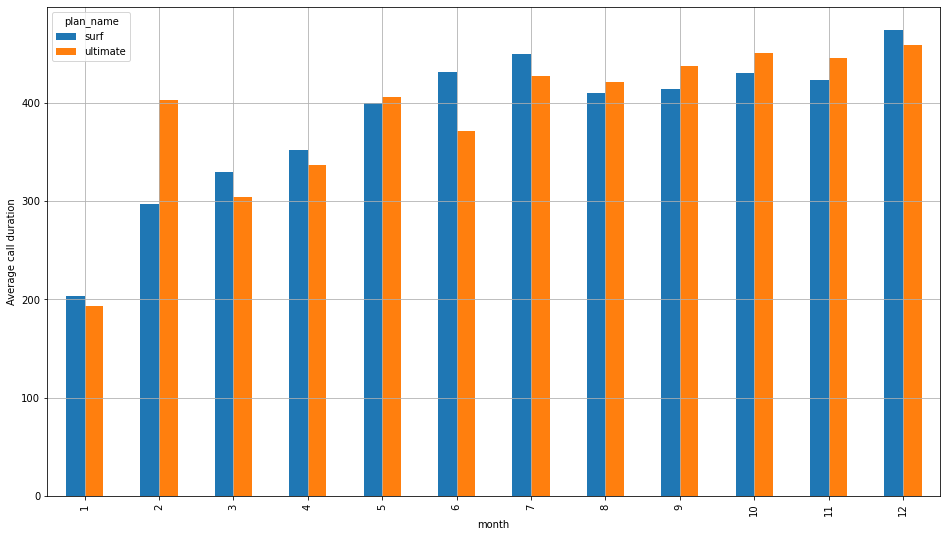

In [64]:
# Compara la duración promedio de llamadas por cada plan por cada mes. Dibuja una gráfica de barras para visualizarlo.
(complete_df
             .pivot_table(index= 'month', columns= 'plan_name', values='duration_minutes', aggfunc= 'mean')
             .plot(kind= 'bar', figsize= (16, 9), grid= True, ylabel= 'Average call duration'))
plt.show()

**Conclusiones:**

- Es evidente como en la segunda mitad de año la duración de llamada promedio aumenta para ambos tipos de planes.
- A pesar de que el plan ultimate incluye un mayor número de minutos, no influye en el promedio de duración de llamada.
- Es importante recalcar que el promedio de llamadas en diciembre es el doble que de enero.

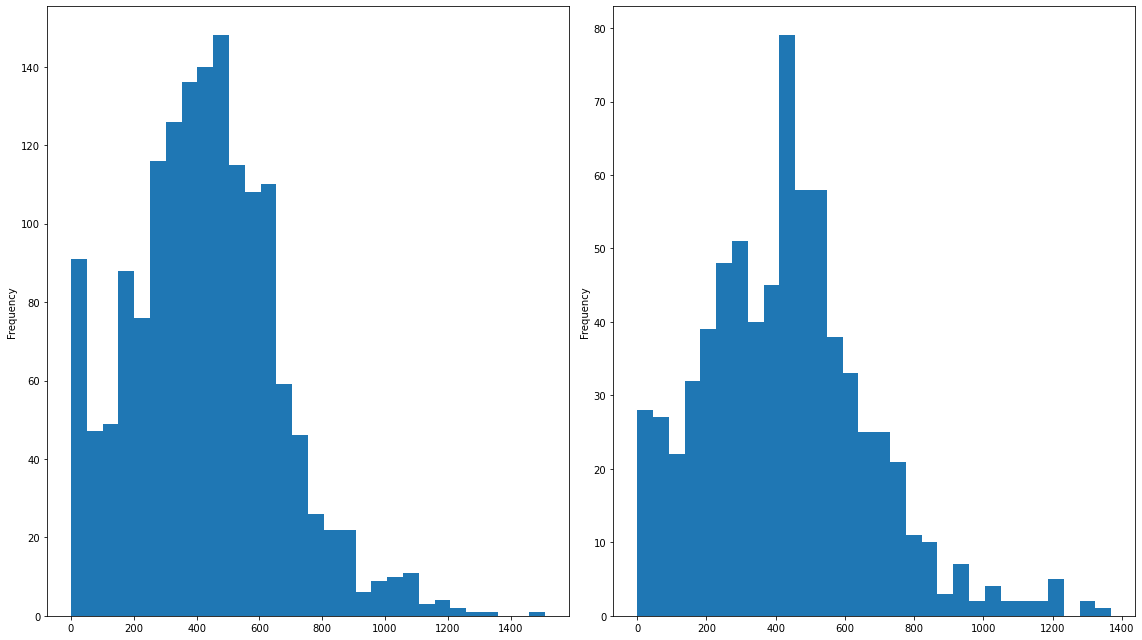

In [65]:
# Compara el número de minutos que los usuarios de cada plan requieren cada mes. Traza un histograma.
plt.rcParams["figure.figsize"] = [10, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(1, 2)
    
(complete_df.query('plan_name == "surf"')['duration_minutes']
           .plot(kind= 'hist', figsize= (16, 9), bins= 30, ax=axes[0]))

(complete_df.query('plan_name == "ultimate"')['duration_minutes']
            .plot(kind= 'hist', figsize= (16, 9), bins= 30, ax=axes[1]))


plt.show()

            

**Conclusiones**

- En ambos planes se identifica un comportamiento similar, ambos histogramas tienen un valor de 500 min con alta frecuencia.
- Se identificón un número importante de meses con duraciones de llamadas muy cortas menores a 5 min o 0 para el plan surf.

In [66]:
# Calcula la media y la varianza de la duración mensual de llamadas.
calls_var_surf = np.var(complete_df.query('plan_name == "surf"')['duration_minutes'])
calls_var_ultimate = np.var(complete_df.query('plan_name == "ultimate"')['duration_minutes'])

calls_mean_surf = complete_df.query('plan_name == "surf"')['duration_minutes'].mean()
calls_mean_ultimate = complete_df.query('plan_name == "ultimate"')['duration_minutes'].mean()

print(f'La varianza de la duración de llamadas mensuales del plan surf es: {calls_var_surf:.2f}')
print(f'La varianza de la duración de llamadas mensuales del plan ultimate es: {calls_var_ultimate:.2f}')

print(f'La media de la duración de llamadas mensuales del plan surf es: {calls_mean_surf:.2f}')
print(f'La media de la duración de llamadas mensuales del plan ultimate es: {calls_mean_ultimate:.2f}')

La varianza de la duración de llamadas mensuales del plan surf es: 54933.33
La varianza de la duración de llamadas mensuales del plan ultimate es: 57764.13
La media de la duración de llamadas mensuales del plan surf es: 428.75
La media de la duración de llamadas mensuales del plan ultimate es: 430.45


**Conclusiones:**

- El cálculo de la varianza y la media para la duración de llamadas mensuales corrobora que el comportamiento para usrarios de los diferentes planes es casi el mismo.

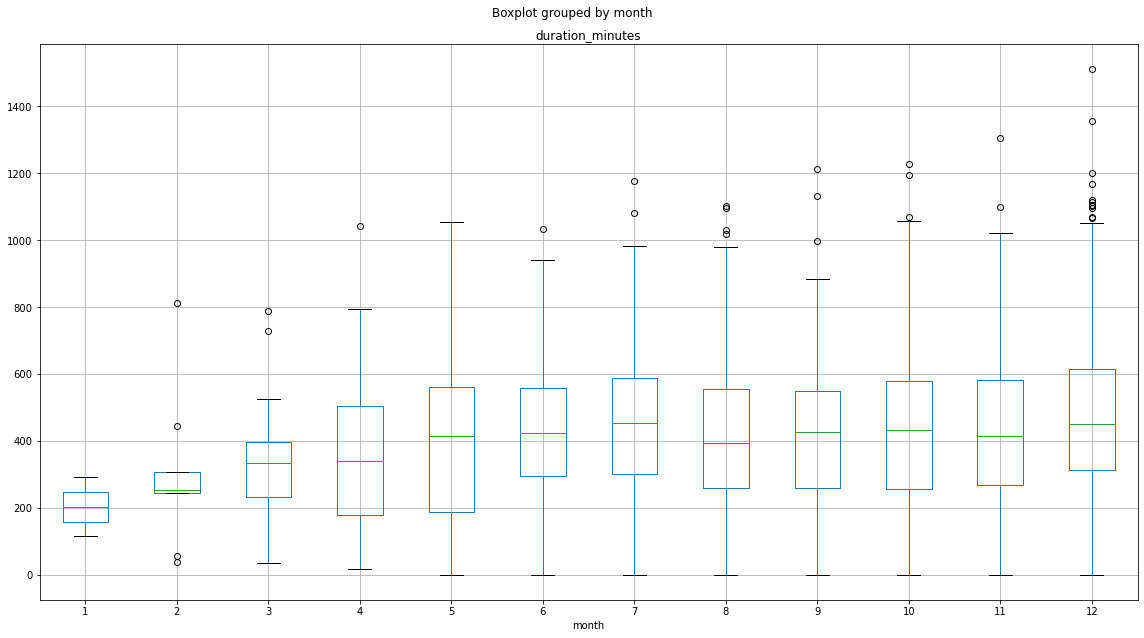

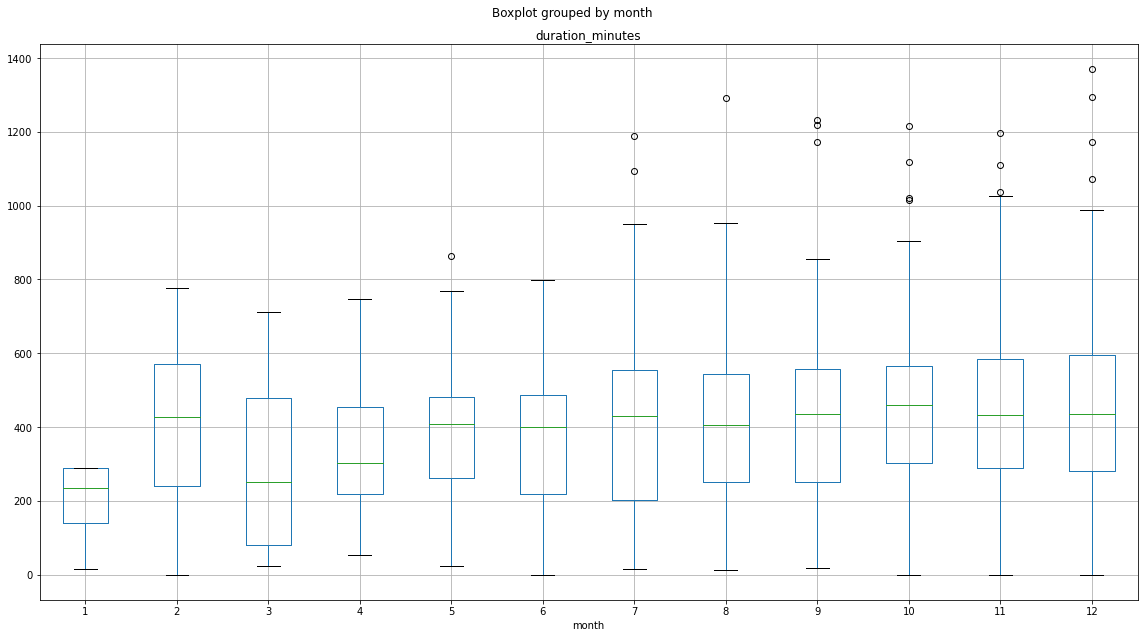

In [67]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas.
complete_df.query('plan_name == "surf"').boxplot(by= 'month', column= 'duration_minutes', figsize= (16, 9))
plt.show()

complete_df.query('plan_name == "ultimate"').boxplot(by= 'month', column= 'duration_minutes', figsize= (16, 9))
plt.show()

**Conclusiones:**

- Según los gráficos de caja podemos observar que desde julio hay meses con duración de llamdas atípicamente largas, sin duda esto incrementa la media en los últimos meses, sobre todo en diciembre que podría ser por las festividades.

### Mensajes

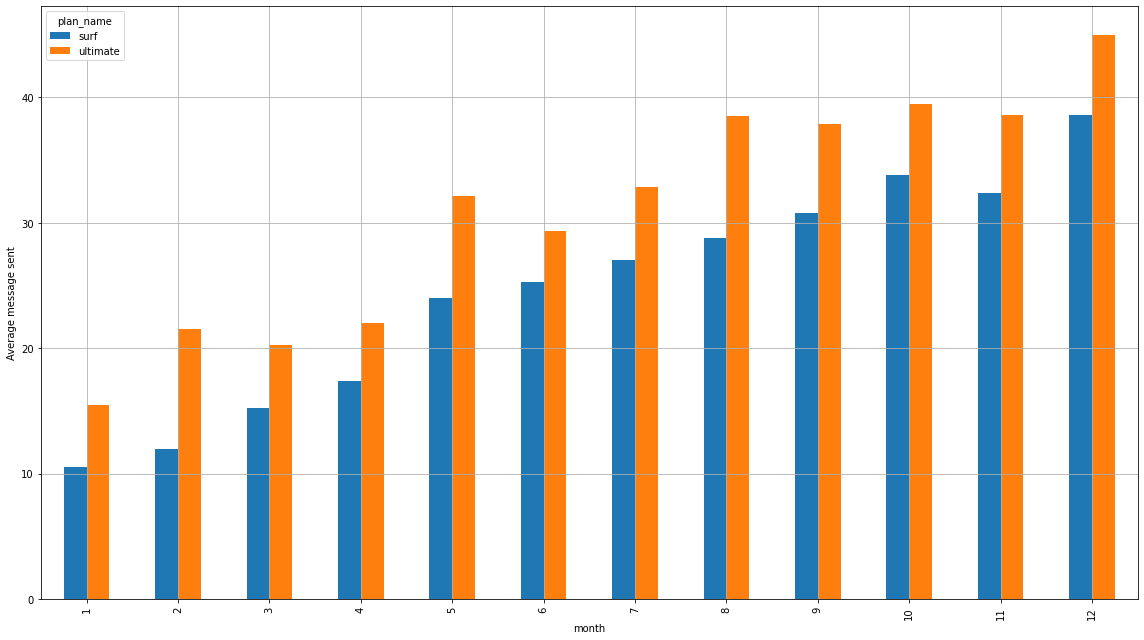

In [68]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
(complete_df
             .pivot_table(index= 'month', columns= 'plan_name', values='messages_count', aggfunc= 'mean')
             .plot(kind= 'bar', figsize= (16, 9), grid= True, ylabel= 'Average message sent'))
plt.show()

**Conclusiones:**

- Según este gráfico podemos observar que el número de mensajes va aumentando a lo largo del año, esto se debe a que los clientes van en aumento.

- Este gráfico puede ser utilizado también para saber si el aumento de clientes es el esperado.

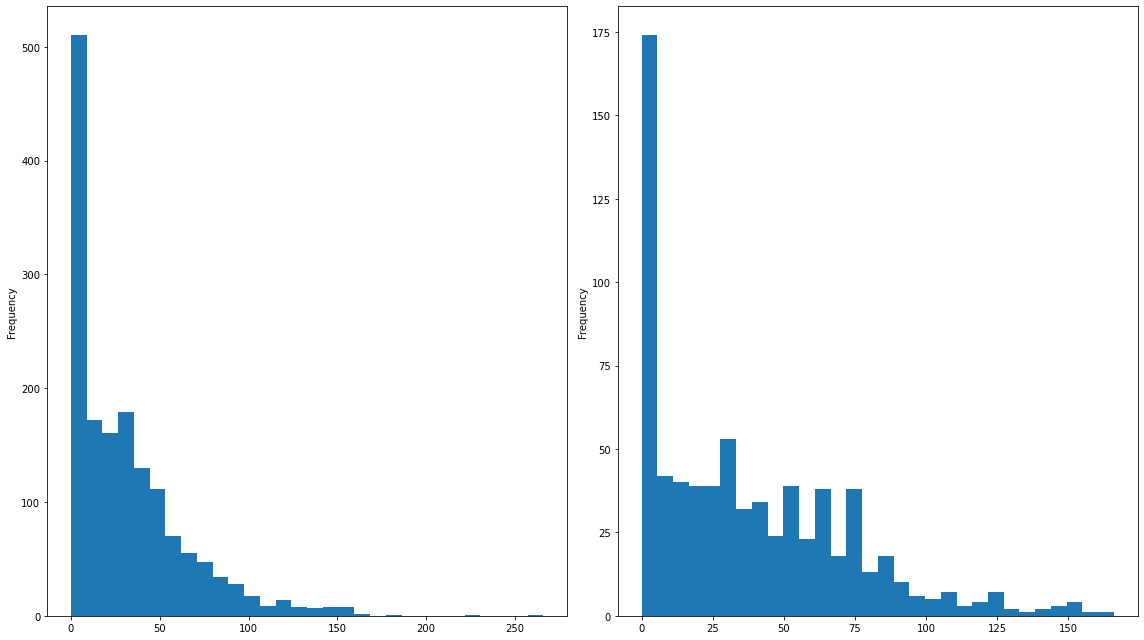

In [69]:

plt.rcParams["figure.figsize"] = [10, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(1, 2)
    
(complete_df.query('plan_name == "surf"')['messages_count']
           .plot(kind= 'hist', figsize= (16, 9), bins= 30, ax=axes[0]))

(complete_df.query('plan_name == "ultimate"')['messages_count']
            .plot(kind= 'hist', figsize= (16, 9), bins= 30, ax=axes[1]))


plt.show()


**Conclusiones:** 

- A pesar de que el número de mensajes va en aumento el cual un buen indicador de que hay mas usuarios, este servicio no esado por muchos clientes ya que se evidencia muchos meses con mensajes no enviados.

- El comportamiento de los usuarios para el plan ultimate como para el plan surf es muy parecido.

### Internet

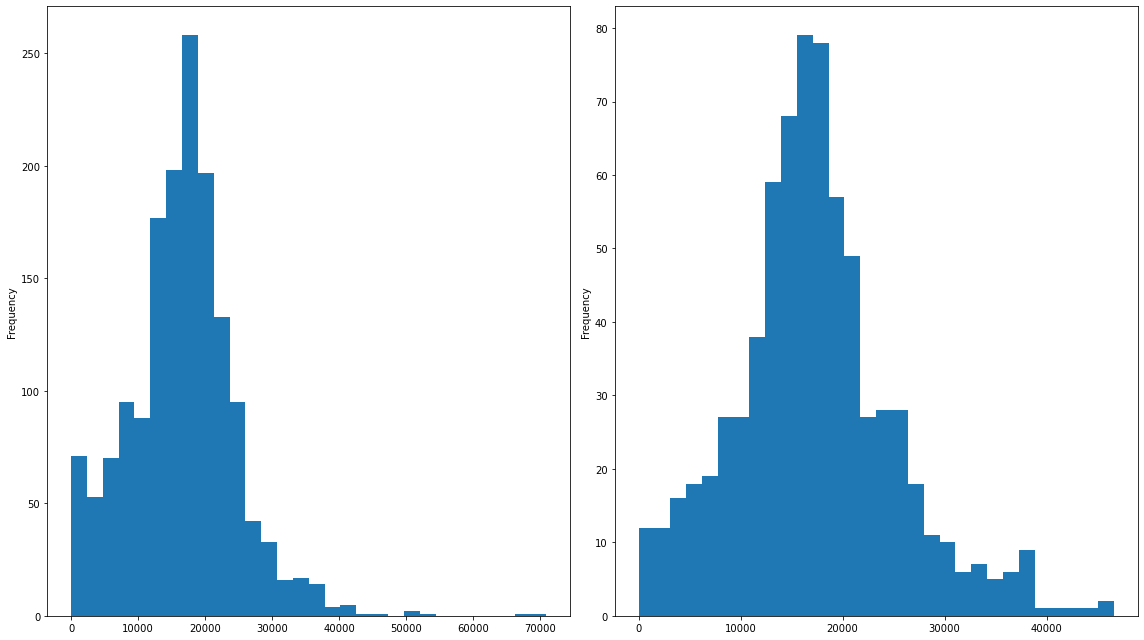

In [70]:
# Compara la cantidad de tráfico de internet consumido por usuarios por plan
plt.rcParams["figure.figsize"] = [10, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(1, 2)
    
(complete_df.query('plan_name == "surf"')['internet_used']
           .plot(kind= 'hist', figsize= (16, 9), bins= 30, ax=axes[0]))

(complete_df.query('plan_name == "ultimate"')['internet_used']
            .plot(kind= 'hist', figsize= (16, 9), bins= 30, ax=axes[1]))


plt.show()

**Conclusiones:**

- A diferencia de los otros servicios, en este caso no observamos acumulación en 0, esto quiere decir que hay pocos meses con sesiones iniciadas.

- Como en el servicio de mensajes y llamadas se puede observar que el comportamiento es muy similar.

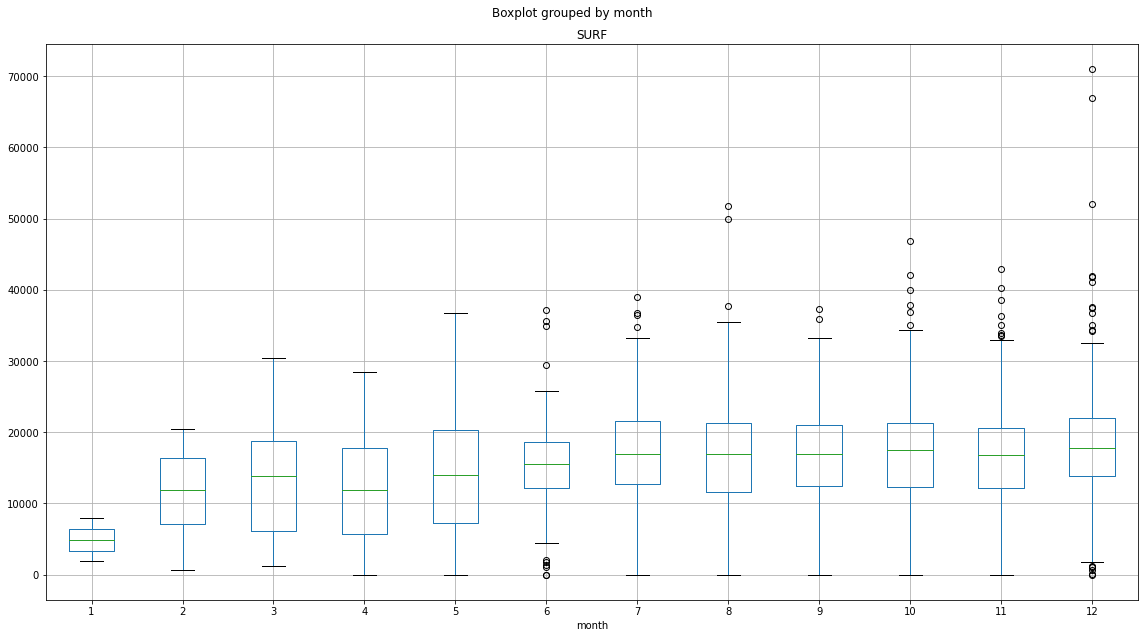

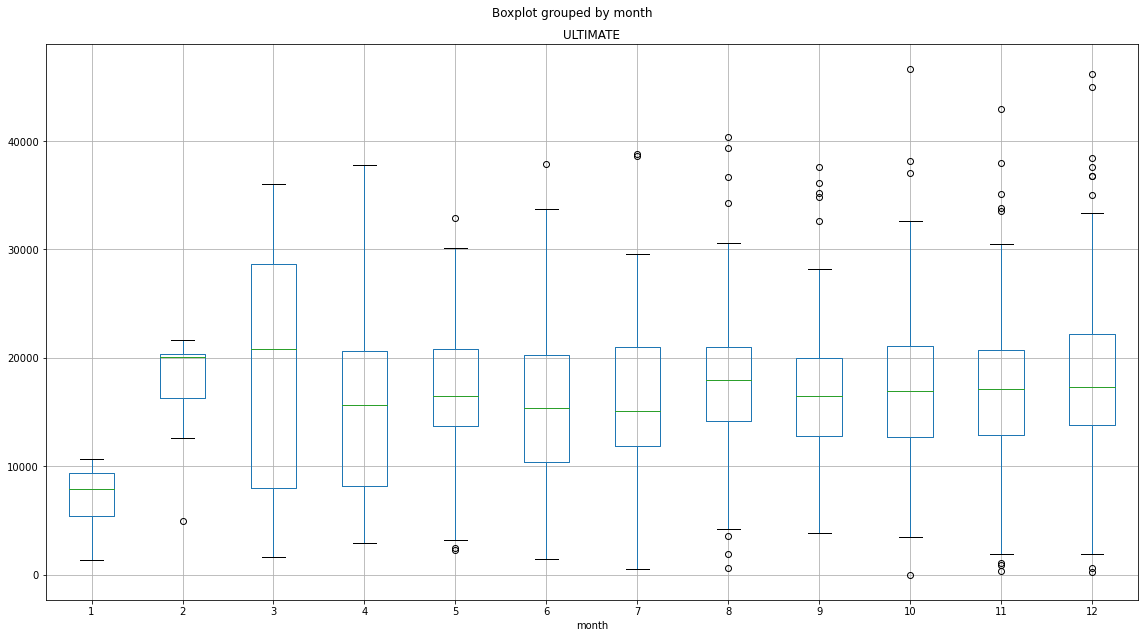

In [71]:
complete_df.query('plan_name == "surf"').boxplot(by= 'month', column= 'internet_used', figsize= (16, 9))
plt.title('SURF')
plt.show()

complete_df.query('plan_name == "ultimate"').boxplot(by= 'month', column= 'internet_used', figsize= (16, 9))
plt.title('ULTIMATE')
plt.show()

**Conclusiones**

- Se puede observar que a partir de julio tenemos meses con número de sesiones altas y se intensifica en diciembre, probablemente por festividades.

- También podemos observar que el consumo de internet se comporta de igual manera para los dos planes.

## Ingreso

In [72]:
print(users.query('plan_name == "ultimate"').shape[0])
print(users.query('plan_name == "surf"').shape[0])

161
339


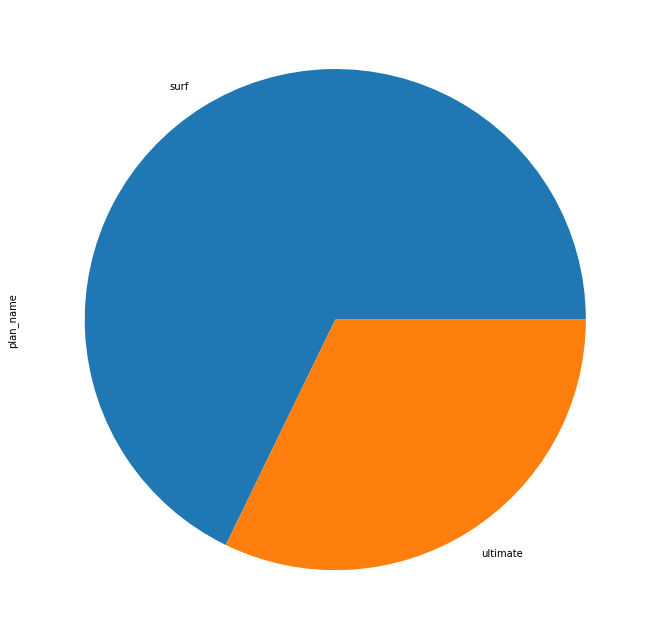

In [73]:
#Realizamos un gráfico de tipo pastel para saber que porcentaje de todos los usuarios pertenece a cada plan.
users.merge(plans, on= 'plan_name', how= 'inner')['plan_name'].value_counts().plot(kind= 'pie', figsize= (16, 9))
plt.show()

**Conclusiones:** 
    
- Según este gráfico podemos observar que la mayoría de usuarios están afiliados a la membresía surf.

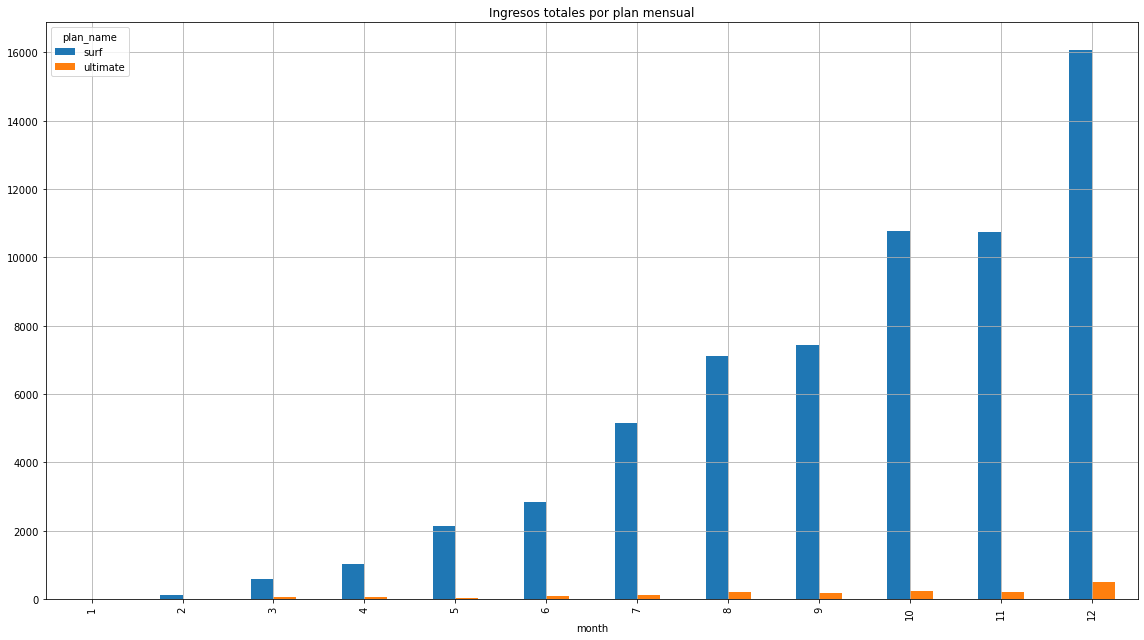

In [74]:
#Realizamos un grafico de barras por mes para cada tipo de plan del ingreso total.
(complete_df
            .pivot_table(index= 'month', columns= 'plan_name', values= 'total_benefit', aggfunc= 'sum')
            .plot(kind= 'bar', figsize= (16, 9), grid= True))
plt.title('Ingresos totales por plan mensual')
plt.show()

**Conclusiones**

- En este gráfico agrupado por plan observamos que el plan surf genera una cantidad mucha mas elevada por el exceso de servicios utilizados.

- También se observa un pico de ingresos en diciembre.

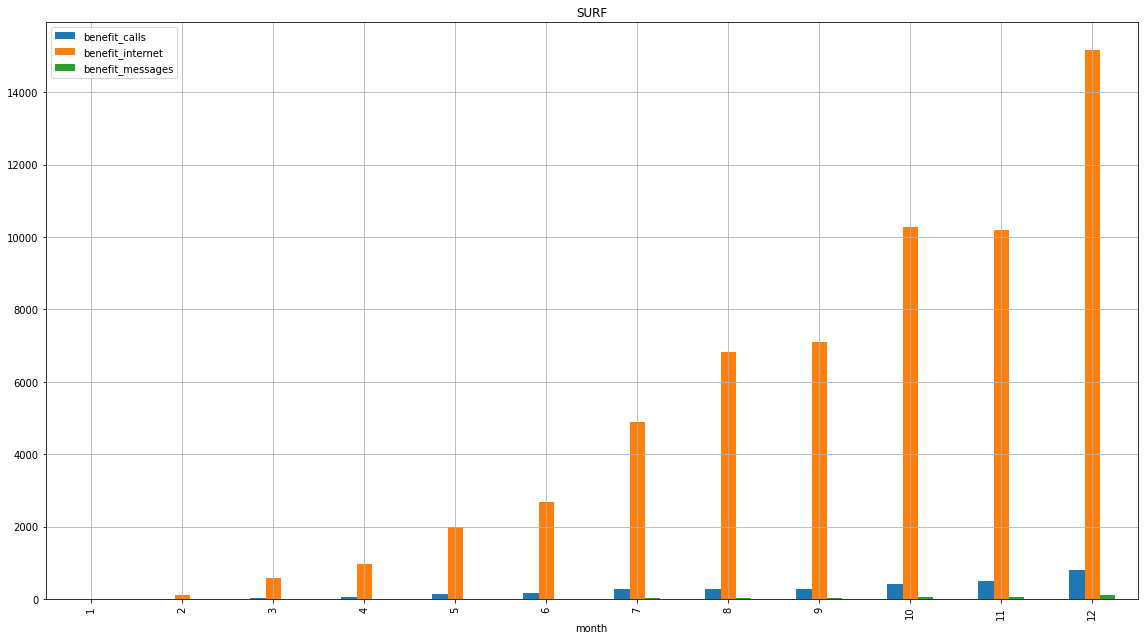

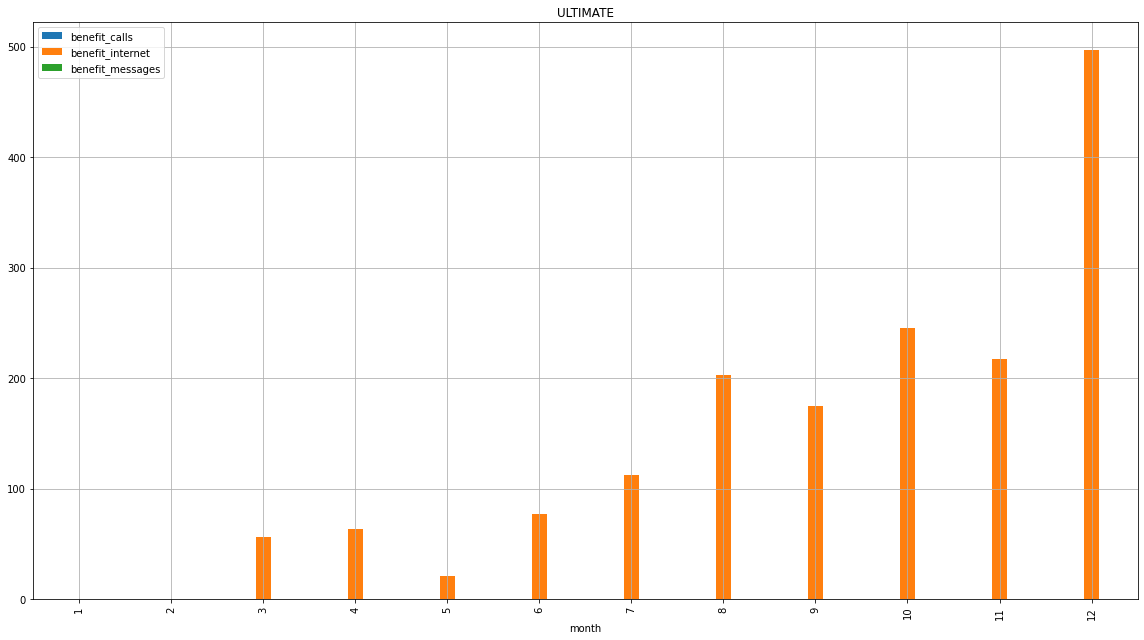

In [72]:
#Realizamos un gráfico de barras para indentificar que servicio genera mas ingresos mensuales para ambos planes
(complete_df
            .query('plan_name == "surf"')
            .pivot_table(index= 'month', values= ['benefit_calls', 'benefit_messages', 'benefit_internet'], aggfunc= 'sum')
            .plot(kind= 'bar', figsize= (16, 9), grid= True))
plt.title('SURF')
plt.show()

(complete_df
            .query('plan_name == "ultimate"')
            .pivot_table(index= 'month', values= ['benefit_calls', 'benefit_messages', 'benefit_internet'], aggfunc= 'sum')
            .plot(kind= 'bar', figsize= (16, 9), grid= True))
plt.title('ULTIMATE')
plt.show()

**Conclusiones:**

- En estos gráficos podemos observar los ingresos generados por servicio excedido, y se puede observar que los ingresos por minutos y mensajes excedidos, son infimos en comparación con los ingresos generados el servicio de internet.

In [73]:
# Calculamos el ingreso generado por pago mensual de las membresías "últimate" y "surf".
df_principal_benefit = complete_df.pivot_table(index= 'plan_name', aggfunc= 'count')['total_benefit'].reset_index()
plan_cost = pd.Series(aux_df['usd_monthly_pay'].unique()).sort_values().reset_index(drop= True)

df_principal_benefit['plan_cost'] = plan_cost
df_principal_benefit['total_cost'] = df_principal_benefit['plan_cost'] * df_principal_benefit['total_benefit']
df_principal_benefit 

,plan_name,total_benefit,plan_cost,total_cost
0,surf,1573,20.0,31460.0
1,ultimate,720,70.0,50400.0


In [74]:
# Calculamos el ingreso generado por cada plan.
total_benefit_df = complete_df.pivot_table(index= 'plan_name', values= 'total_benefit', aggfunc= 'sum').reset_index()
total_benefit_df.columns= ['plan_name', 'benefit_extra']
total_benefit_df['benefit_principal'] = df_principal_benefit['total_cost']
total_benefit_df['total_anual_benefit'] = total_benefit_df['benefit_extra'] + total_benefit_df['benefit_principal']
total_benefit_df.columns = ['plan_name','benefit_by_exced', 'benefit_by_membership', 'total_anual_benefit']
total_benefit_df 

,plan_name,benefit_by_exced,benefit_by_membership,total_anual_benefit
0,surf,64031.18,31460.0,95491.18
1,ultimate,1666.00,50400.0,52066.00


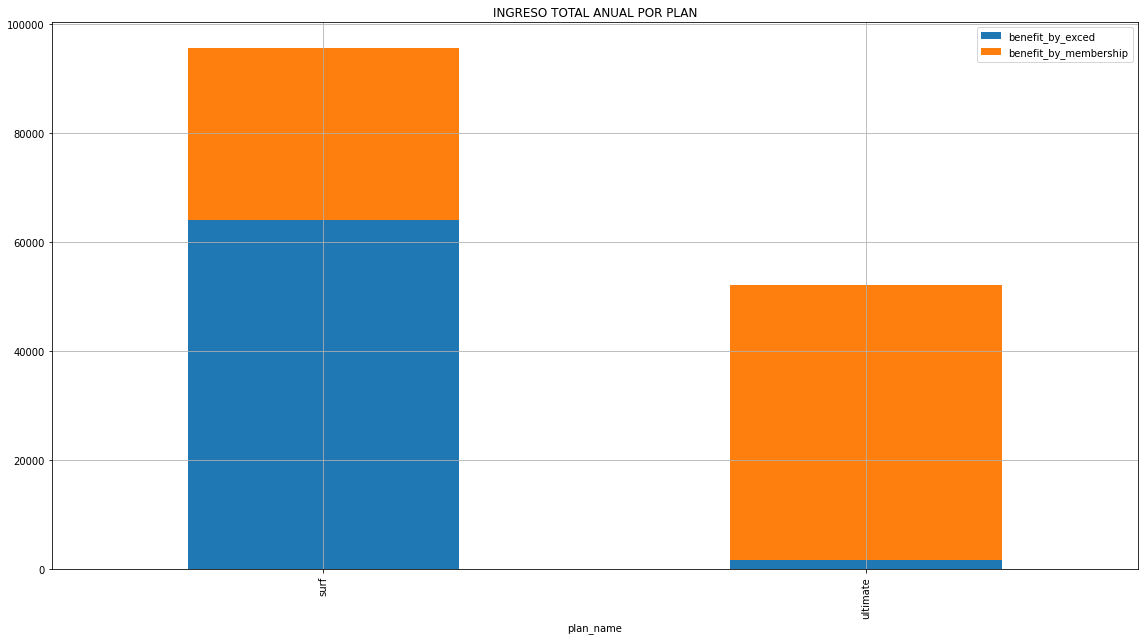

In [75]:
#Finalmente realizamos un gráfico de barras para observar que plan genera mas ingresos a la empresa.
total_benefit_df.plot(kind= 'bar', x= 'plan_name', y= ['benefit_by_exced', 'benefit_by_membership'], 
                      figsize= (16, 9), grid= True, stacked= True)

plt.title('INGRESO TOTAL ANUAL POR PLAN')

plt.show()

**Conclusiones:**
   
- En este gráfico podemos observar que a pesar de que la cantidad de usuarios afiliados a "surf" es mayor que a "ultimate", "ultimate" genera mas ingresos por el costo de la membresía ya que es un servicio mucho mas caro. Sin embrago "surf" incluye menos cantidad de beneficios, esto lo hce mas propenso a que los usuarios excedan el uso de la cantidad de beneficios incluidos en el plan, en consecuencia la membresía "surf" genera mucho mas ingresos en total. 


## Probar las hipótesis estadísticas.

**Hipostesis Nula:** 

El ingreso promedio de los usuarios de los planes de llamadas ultimate y surf son iguales.

In [76]:
# Definimos los conjuntos de datos en diferentes variables.
ing_month_ultimate = complete_df.query('plan_name == "ultimate"')['benefit_calls']
ing_month_surf = complete_df.query('plan_name == "surf"')['benefit_calls']

# Definimos el valor alpha

alpha = 0.05

# Realizamos la prueba

results = st.ttest_ind(ing_month_ultimate, ing_month_surf, equal_var= True)

# Utilizamos el parámetro equal_value = True ya que identificamos que los comportamientos para ambos planes es similar.



if (results.pvalue) < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No rechazamos la hipotesis nula')


Rechazamos la hipótesis nula


In [77]:
# Definimos las medias y los conjuntos de datos en diferentes variables.
ing_ny_nj = (complete_df
             .merge(users, on= 'user_id')
             .query('city.str.contains("NY-NJ")')
             .pivot_table(index= 'month', values= 'total_benefit'))

ing_all = (complete_df
           .merge(users, on= 'user_id')
           .query('~city.str.contains("NY-NJ")')
           .pivot_table(index= 'month', values= 'total_benefit'))


new_row = {'total_benefit': 0.0}
ing_ny_nj = ing_ny_nj.append(new_row, ignore_index= True)



# Definimos el valor alpha

alpha = 0.05

# Realizamos la prueba

results = st.ttest_rel(ing_ny_nj ,ing_all)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: [0.36619294]
No rechazamos la hipótesis nula


## Conclusión general

A partir del análisis que se llevó a cabo sobre este conjunto de datos el cula representa el consumo del servicio de telefonía por parte de la empresa Megaline, se puede concluir lo siguiente:

1. Que de los dos planes ofertados 'surf' y 'ultimate', el primero genera anualmente una cantidad de ingresos considerablemente mas alta que el segundo producto, el plan surf genera el 65% de los ingresos de la empresa a pesar que solo el 32% de los usrarios están afiliados a este plan. 


2. También se puede observar un alto consumo en los últimos meses del año, ya que este fenómeno se repite en los dos planes y en todos los servicios se puede entender que es por las festividades.


3. Con respecto a la salud de la empresa se puede decir que está dentro de lo esperado, ya que se puede observar un aumento progresivo de clintes, esto se traduce en un aumento constante de ingresos.


4. Es importante destacar que el comportamiento de los usurarios en base a consumo de llamadas, internet y mensajes es muy similar, por lo tanto sería una buena decisión por parte de la empresa destinar mayor cantidad de recursos de marketing para incentivar el uso del plan surf.